# 세계 국제 보건기구(WHO) 에서
# 전세계 covid19 현황 자료를 다운받아
# 데이터 시각화

In [1]:
%run covid19_world_function.ipynb

In [2]:
import matplotlib.pyplot as plt  
import csv 
import operator 
import datetime as dt  
import pandas as pd
import numpy as np
from pandas import DataFrame as df
%matplotlib inline

plt.rcParams['font.family'] = 'NanumGothic'

In [3]:
# https://geopandas.org/
# GDAL-3.0.4-cp37-cp37m-win_amd64.whl
# Fiona-1.8.13-cp37-cp37m-win_amd64.whl
# Shapely-1.7.0-cp37-cp37m-win_amd64.whl
# geopandas 모듈을 설치하기 위한 whl 파일 세개.
# python -m pip install 'whl 파일명' 을 이용해 설치

import geopandas as gpd

In [4]:
covid = pd.read_csv('covid-data.csv', engine='python')
covid.head()

,iso_code,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,tests_units
0,ABW,Aruba,2020-03-13,2,2,0,0,18.733,18.733,0.0,0.0,NaN,NaN,NaN,NaN,NaN
1,ABW,Aruba,2020-03-20,4,2,0,0,37.465,18.733,0.0,0.0,NaN,NaN,NaN,NaN,NaN
2,ABW,Aruba,2020-03-24,12,8,0,0,112.395,74.930,0.0,0.0,NaN,NaN,NaN,NaN,NaN
3,ABW,Aruba,2020-03-25,17,5,0,0,159.227,46.831,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,ABW,Aruba,2020-03-26,19,2,0,0,177.959,18.733,0.0,0.0,NaN,NaN,NaN,NaN,NaN


In [11]:
# iso_code 와 location 이 서로 겹치는 정보이므로
# iso_code 를 drop

covid = covid.drop(['iso_code'], axis=1) 

# 이후 location 의 정보만으로 geopandas 를 사용하기 힘들기에
# iso_code 를 드랍하지 않음으로 결정

In [12]:
# location 의 중복을 제외한 요소의 종류와 개수가 얼마나있는지 확인
location = covid['location'].unique()
location

array(['Aruba', 'Afghanistan', 'Angola', 'Anguilla', 'Albania', 'Andorra',
       'United Arab Emirates', 'Argentina', 'Armenia',
       'Antigua and Barbuda', 'Australia', 'Austria', 'Azerbaijan',
       'Burundi', 'Belgium', 'Benin', 'Bonaire Sint Eustatius and Saba',
       'Burkina Faso', 'Bangladesh', 'Bulgaria', 'Bahrain', 'Bahamas',
       'Bosnia and Herzegovina', 'Belarus', 'Belize', 'Bermuda',
       'Bolivia', 'Brazil', 'Barbados', 'Brunei', 'Bhutan', 'Botswana',
       'Central African Republic', 'Canada', 'Switzerland', 'Chile',
       'China', "Cote d'Ivoire", 'Cameroon',
       'Democratic Republic of Congo', 'Congo', 'Colombia', 'Cape Verde',
       'Costa Rica', 'Cuba', 'Curacao', 'Cayman Islands', 'Cyprus',
       'Czech Republic', 'Germany', 'Djibouti', 'Dominica', 'Denmark',
       'Dominican Republic', 'Algeria', 'Ecuador', 'Egypt', 'Eritrea',
       'Spain', 'Estonia', 'Ethiopia', 'Finland', 'Fiji',
       'Falkland Islands', 'France', 'Faeroe Islands', 'Gabon',
 

## 한, 중, 일, 미  에 대한 
## 총/신규 확진자 , 총/신규 사망자
## 시각화

In [13]:
kor = location_value('South Korea')
jap = location_value('Japan')
chi = location_value('China')
usa = location_value('United States')

C:\Users\Owner\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


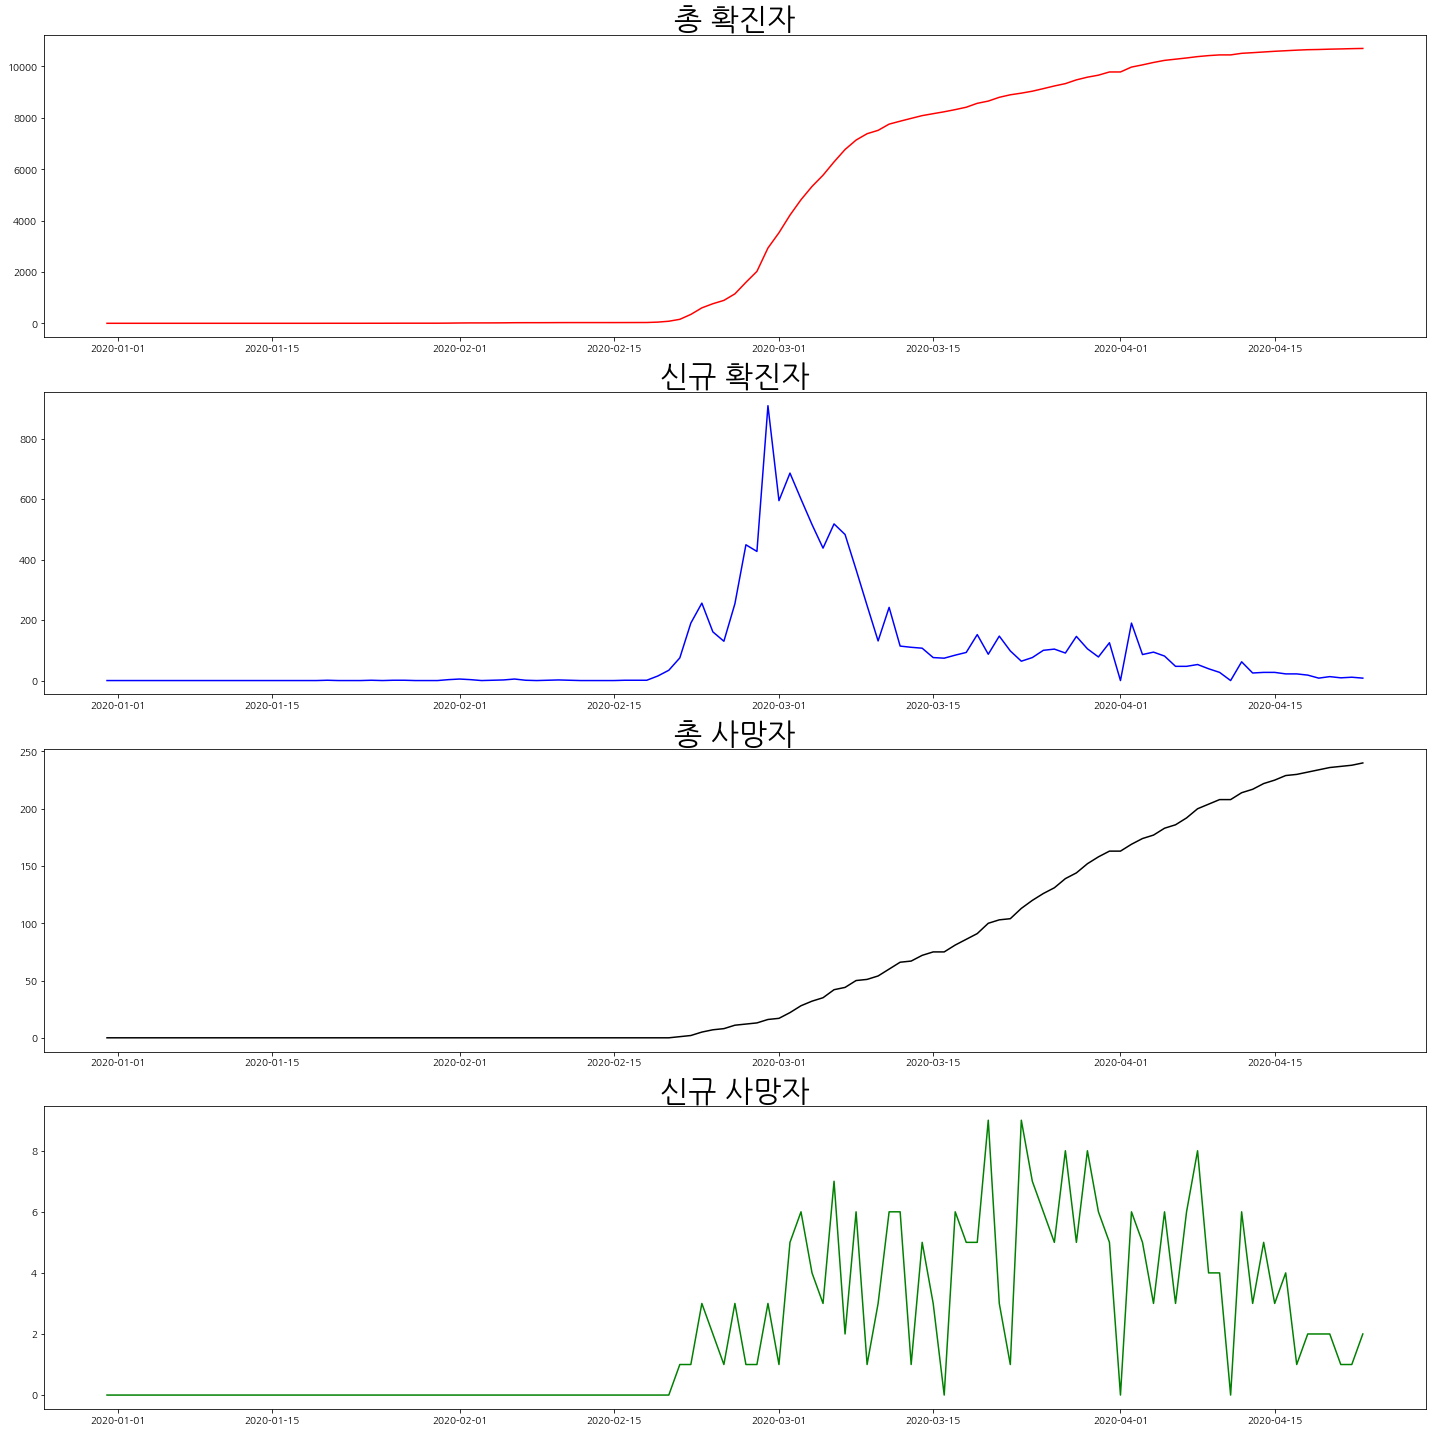

In [14]:
# 한국의 그래프 그리기
draw_loc_value(kor)

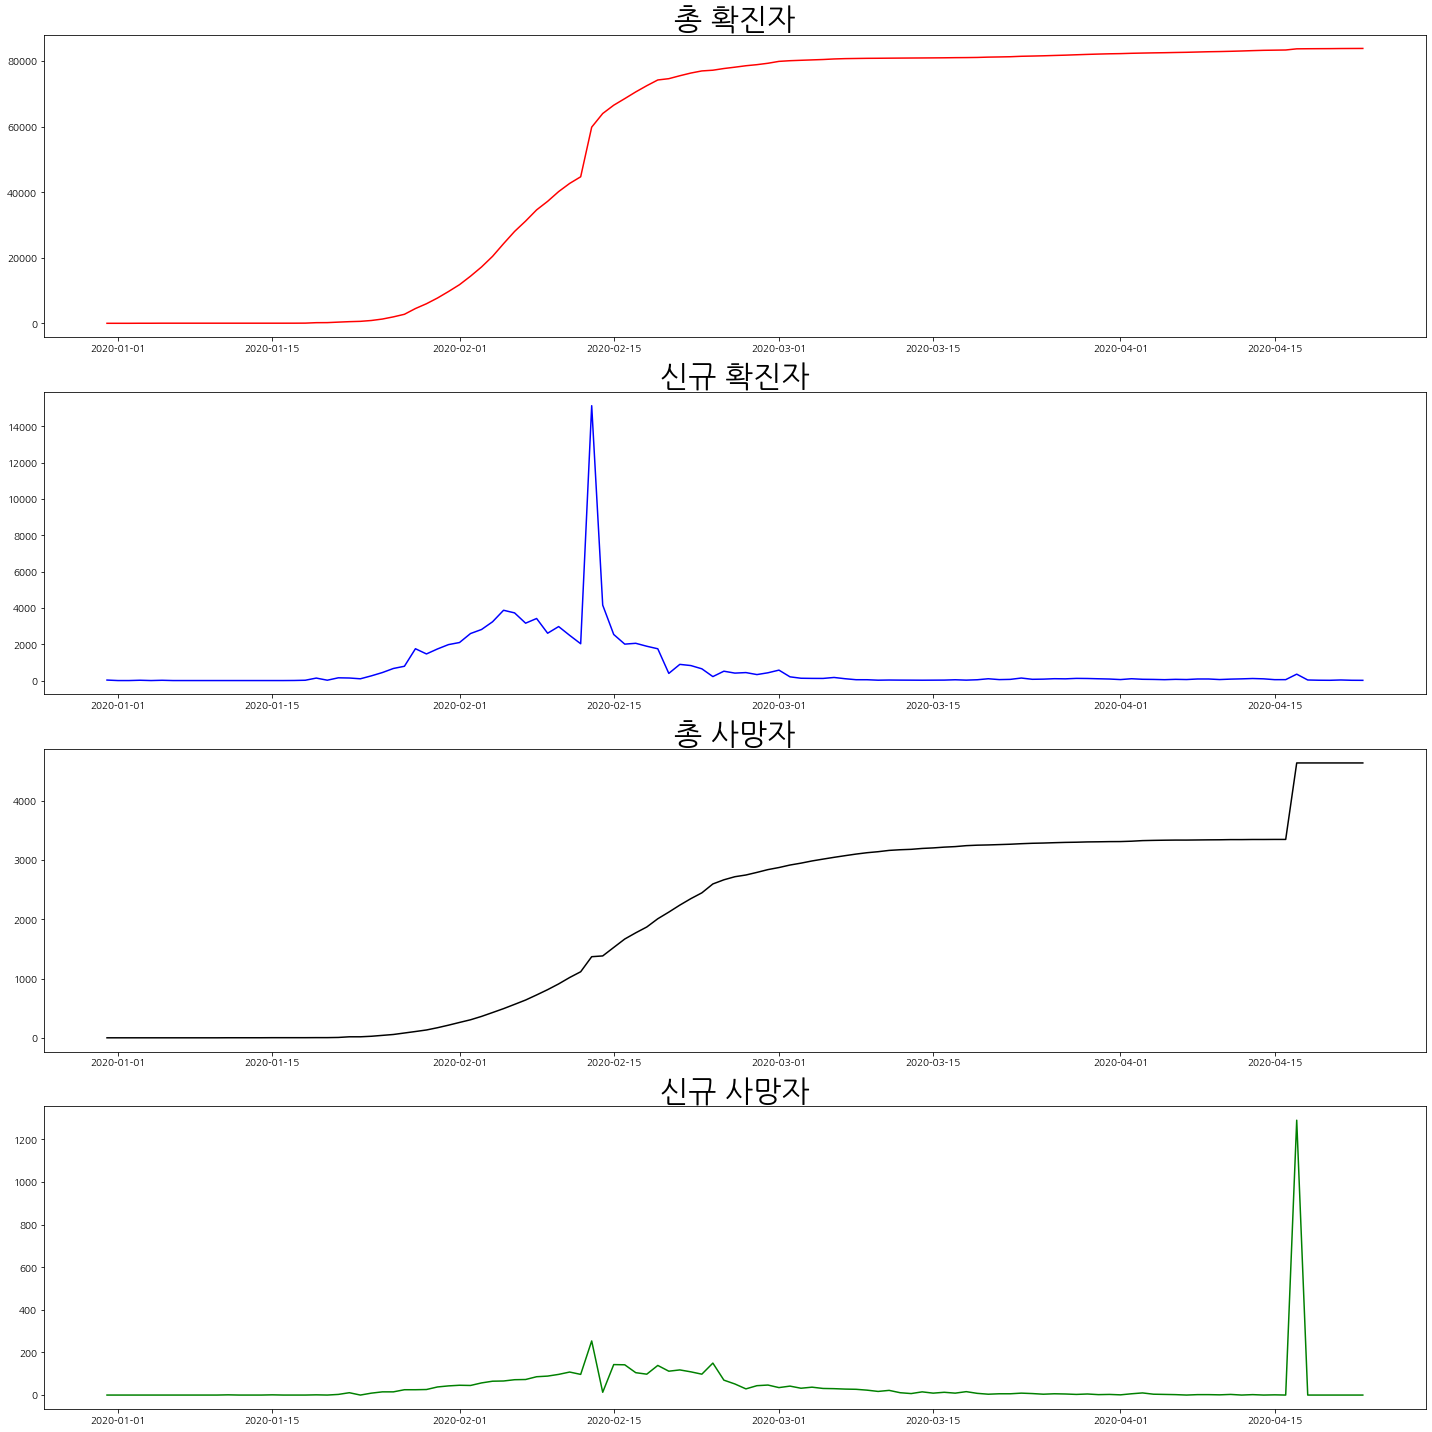

In [15]:
# 중국의 그래프 그리기
draw_loc_value(chi)

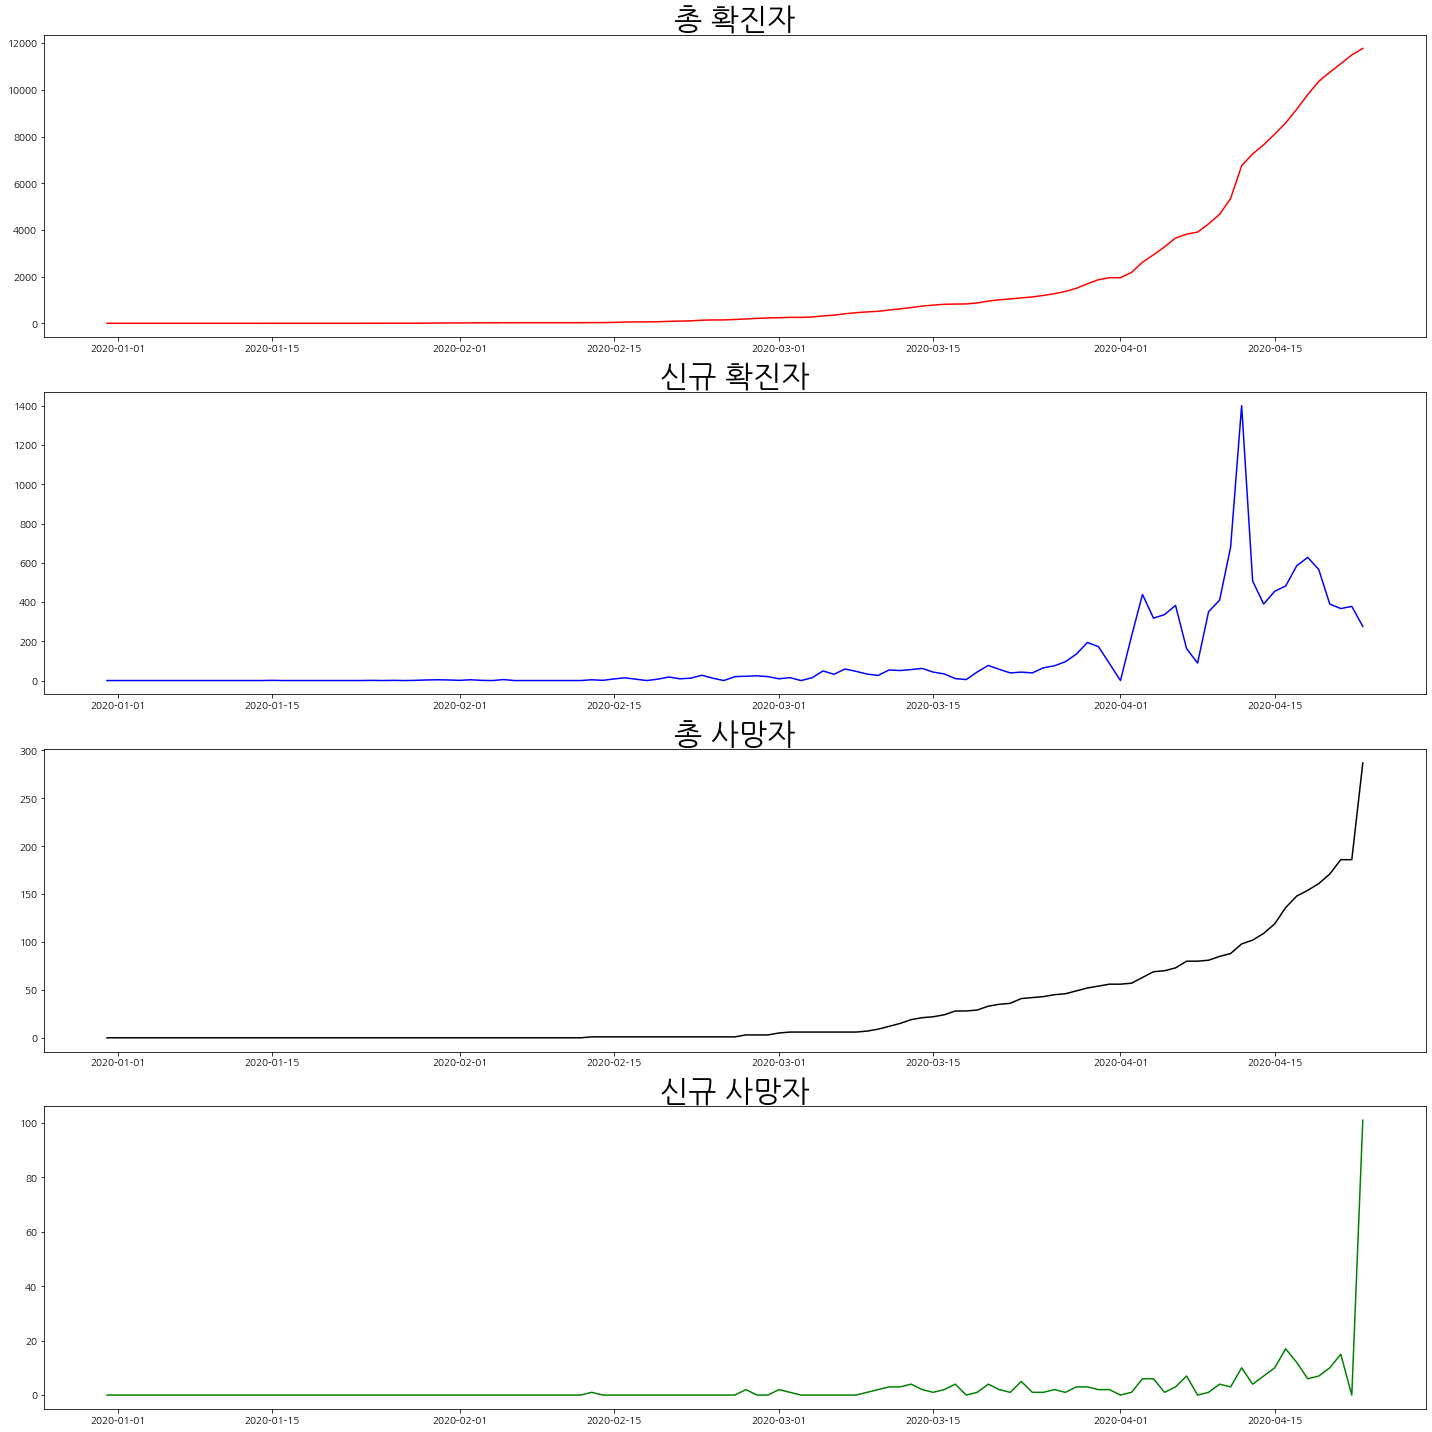

In [16]:
# 일본의 그래프 그리기
draw_loc_value(jap)

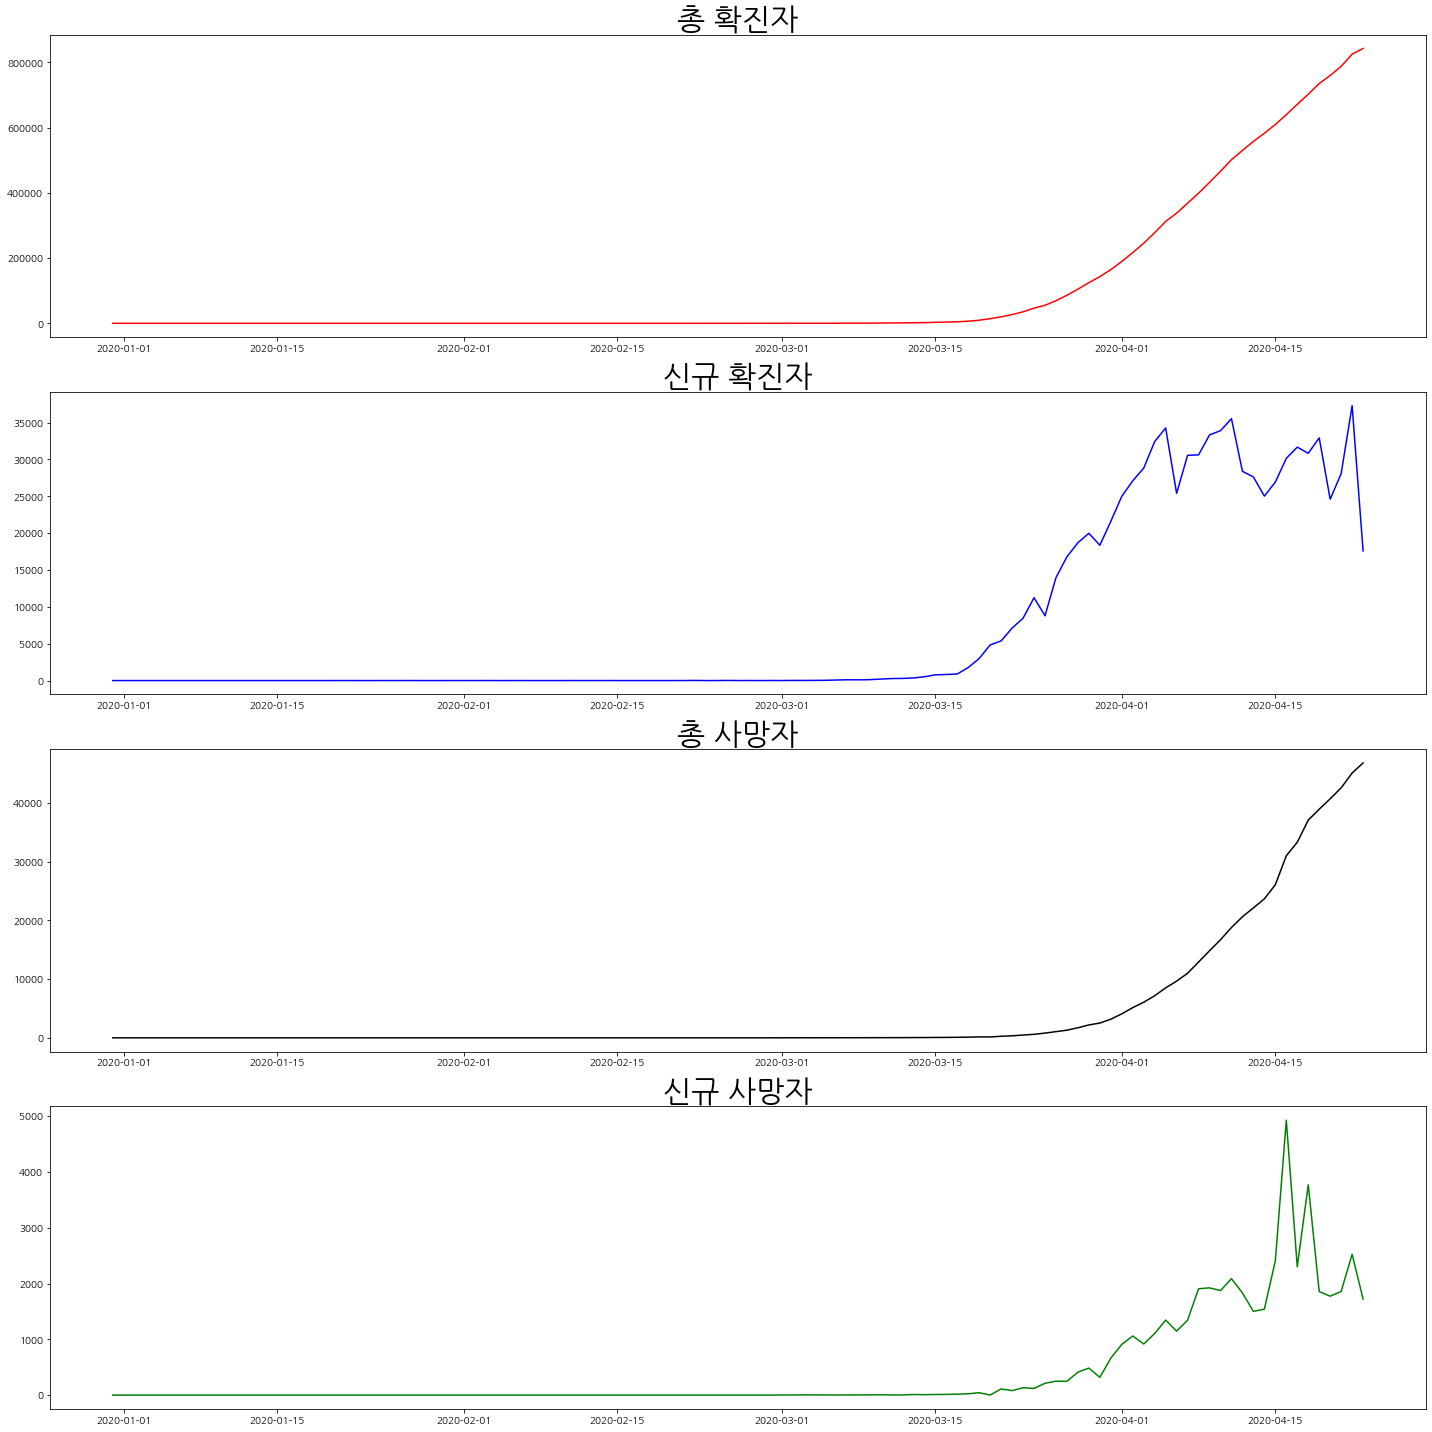

In [17]:
# 미국의 그래프 그리기
draw_loc_value(usa)

### 각 나라별 총 확진자 수를 보기 쉽게 그림으로 표현해보자


In [21]:
# 각국의 총 확진자들의 dataframe 을 만들자
loc_tot = covid[['iso_code', 'location', 'total_cases']]
loc_tot

,iso_code,location,total_cases
0,ABW,Aruba,2
1,ABW,Aruba,4
2,ABW,Aruba,12
3,ABW,Aruba,17
4,ABW,Aruba,19
...,...,...,...
12664,ZWE,Zimbabwe,25
12665,ZWE,Zimbabwe,25
12666,ZWE,Zimbabwe,25
12667,ZWE,Zimbabwe,28


In [22]:
loc_tot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12669 entries, 0 to 12668
Data columns (total 3 columns):
iso_code       12669 non-null object
location       12669 non-null object
total_cases    12669 non-null int64
dtypes: int64(1), object(2)
memory usage: 297.1+ KB


In [23]:
# 각 나라별 최종 총 확진자의 수 (total_cases 의 최댓값) 을 추출하여
# 새로운 데이터프레임 생성

loc_tot_max = loc_tot.loc[loc_tot.groupby(['location'])['total_cases'].idxmax()]
loc_tot_max

,iso_code,location,total_cases
136,AFG,Afghanistan,1176
243,ALB,Albania,634
3431,DZA,Algeria,2910
284,AND,Andorra,723
165,AGO,Angola,24
...,...,...,...
12354,VEN,Venezuela,288
12520,VNM,Vietnam,268
12527,YEM,Yemen,1
12634,ZMB,Zambia,74


In [25]:
# geopandas 가 제공하는 기본 데이터셋
gpd.datasets.available

['naturalearth_cities', 'naturalearth_lowres', 'nybb']

C:\Users\Owner\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Owner\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


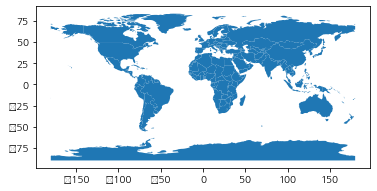

In [35]:
# 세계지도 불러오기
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.plot()

In [37]:
# 세계지도를 기반으로 한 하나의 데이터셋 
# gdp 데이터셋 불러오기
countries = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

countries

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
...,...,...,...,...,...,...
172,7111024,Europe,Serbia,SRB,101800.0,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
173,642550,Europe,Montenegro,MNE,10610.0,"POLYGON ((20.07070 42.58863, 19.80161 42.50009..."
174,1895250,Europe,Kosovo,-99,18490.0,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."
175,1218208,North America,Trinidad and Tobago,TTO,43570.0,"POLYGON ((-61.68000 10.76000, -61.10500 10.890..."


In [40]:
# 여기서 내가 필요한건 continent와 name, iso_a3, 그리고 geometry columns
# 따라서 나머지 drop

countries = countries.drop(['pop_est', 'gdp_md_est'], axis = 1)
countries

,continent,name,iso_a3,geometry
0,Oceania,Fiji,FJI,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,Africa,Tanzania,TZA,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,Africa,W. Sahara,ESH,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,North America,Canada,CAN,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,North America,United States of America,USA,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
...,...,...,...,...
172,Europe,Serbia,SRB,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
173,Europe,Montenegro,MNE,"POLYGON ((20.07070 42.58863, 19.80161 42.50009..."
174,Europe,Kosovo,-99,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."
175,North America,Trinidad and Tobago,TTO,"POLYGON ((-61.68000 10.76000, -61.10500 10.890..."


In [45]:
# 공통된 데이터를 가장 많이 갖는 iso 를 기준으로 merge 하기위해
# countries 의 iso_a3 를 rename

countries = countries.rename(columns = {'iso_a3':'iso_code'})
countries

,continent,name,iso_code,geometry
0,Oceania,Fiji,FJI,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,Africa,Tanzania,TZA,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,Africa,W. Sahara,ESH,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,North America,Canada,CAN,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,North America,United States of America,USA,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
...,...,...,...,...
172,Europe,Serbia,SRB,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
173,Europe,Montenegro,MNE,"POLYGON ((20.07070 42.58863, 19.80161 42.50009..."
174,Europe,Kosovo,-99,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."
175,North America,Trinidad and Tobago,TTO,"POLYGON ((-61.68000 10.76000, -61.10500 10.890..."


In [48]:
# iso_code 를 이용해 merge 
new_loc = pd.merge(loc_tot_max, countries, on = 'iso_code', how = 'outer')
new_loc

,iso_code,location,total_cases,continent,name,geometry
0,AFG,Afghanistan,1176.0,Asia,Afghanistan,"POLYGON ((66.51861 37.36278, 67.07578 37.35614..."
1,ALB,Albania,634.0,Europe,Albania,"POLYGON ((21.02004 40.84273, 20.99999 40.58000..."
2,DZA,Algeria,2910.0,Africa,Algeria,"POLYGON ((-8.68440 27.39574, -8.66512 27.58948..."
3,AND,Andorra,723.0,NaN,NaN,None
4,AGO,Angola,24.0,Africa,Angola,"MULTIPOLYGON (((12.99552 -4.78110, 12.63161 -4..."
...,...,...,...,...,...,...
215,PRK,NaN,NaN,Asia,North Korea,"MULTIPOLYGON (((130.78000 42.22001, 130.78000 ..."
216,TJK,NaN,NaN,Asia,Tajikistan,"POLYGON ((67.83000 37.14499, 68.39203 38.15703..."
217,TKM,NaN,NaN,Asia,Turkmenistan,"POLYGON ((52.50246 41.78332, 52.94429 42.11603..."
218,SLB,NaN,NaN,Oceania,Solomon Is.,"MULTIPOLYGON (((162.11902 -10.48272, 162.39865..."


In [49]:
# 새로 생성한 new_loc 확인
new_loc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 220 entries, 0 to 219
Data columns (total 6 columns):
iso_code       220 non-null object
location       206 non-null object
total_cases    206 non-null float64
continent      177 non-null object
name           177 non-null object
geometry       177 non-null geometry
dtypes: float64(1), geometry(1), object(4)
memory usage: 12.0+ KB


In [52]:
# NaN 값을 다 drop
droped_loc =new_loc.dropna()
droped_loc

,iso_code,location,total_cases,continent,name,geometry
0,AFG,Afghanistan,1176.0,Asia,Afghanistan,"POLYGON ((66.51861 37.36278, 67.07578 37.35614..."
1,ALB,Albania,634.0,Europe,Albania,"POLYGON ((21.02004 40.84273, 20.99999 40.58000..."
2,DZA,Algeria,2910.0,Africa,Algeria,"POLYGON ((-8.68440 27.39574, -8.66512 27.58948..."
4,AGO,Angola,24.0,Africa,Angola,"MULTIPOLYGON (((12.99552 -4.78110, 12.63161 -4..."
7,ARG,Argentina,3276.0,South America,Argentina,"MULTIPOLYGON (((-68.63401 -52.63637, -68.25000..."
...,...,...,...,...,...,...
201,VEN,Venezuela,288.0,South America,Venezuela,"POLYGON ((-60.73357 5.20028, -60.60118 4.91810..."
202,VNM,Vietnam,268.0,Asia,Vietnam,"POLYGON ((104.33433 10.48654, 105.19991 10.889..."
203,YEM,Yemen,1.0,Asia,Yemen,"POLYGON ((52.00001 19.00000, 52.78218 17.34974..."
204,ZMB,Zambia,74.0,Africa,Zambia,"POLYGON ((30.74001 -8.34001, 31.15775 -8.59458..."


In [ ]:
droped_loc = droped_lod

AttributeError: 'Line2D' object has no property 'column'

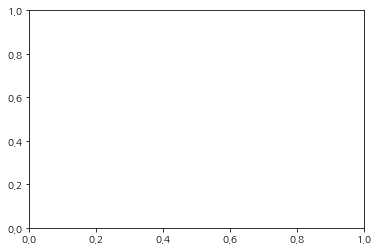

In [55]:
ax = droped_loc.plot(column='total_cases', legend=True, scheme='quantiles', cmap="Blues", k=5)
ax.set_axis_off()
ax.set_title("Covid19 확산 현황")
plt.show()

In [18]:
countries = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

countries.tail(3)

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
174,1895250,Europe,Kosovo,-99,18490.0,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."
175,1218208,North America,Trinidad and Tobago,TTO,43570.0,"POLYGON ((-61.68000 10.76000, -61.10500 10.890..."
176,13026129,Africa,S. Sudan,SSD,20880.0,"POLYGON ((30.83385 3.50917, 29.95350 4.17370, ..."


C:\Users\Owner\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Owner\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


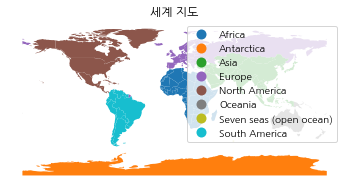

In [14]:
ax = countries.plot(column="continent", legend=True, categorical=True)
ax.set_title("세계 지도")
ax.set_axis_off()
plt.show()

C:\Users\Owner\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Owner\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


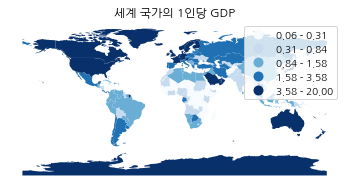

In [17]:
countries['gdp_per_cap'] = countries['gdp_md_est'] / countries['pop_est'] * 100

ax = countries.plot(column='gdp_per_cap', legend=True, scheme='quantiles', cmap="Blues", k=5)
ax.set_axis_off()
ax.set_title("세계 국가의 1인당 GDP")
plt.show()